# Day 7 (9/1/2022)

## Phase 0: Preparation

In [1]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [2]:
# import dataset

airport = pd.read_csv("E:/Python/Airport/Airports.csv")
airport 

,Rank,Airport,Location,Country,Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN/ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL/KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU/ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW/KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX/ZGSZ,37916059,2020
...,...,...,...,...,...,...,...
245,46,United States Newark Liberty International Air...,"Newark, New Jersey",United States,EWR/KEWR,40289969,2016
246,47,Philippines Ninoy Aquino International Airport,"Pasay/Parañaque, Metro Manila",Philippines,MNL/RPLL,39534991,2016
247,48,Japan Narita International Airport,"Narita, Chiba",Japan,NRT/RJAA,39000563,2016
248,49,United States Minneapolis/St Paul Internationa...,"St. Paul, Minnesota",United States,MSP/KMSP,37413728,2016


In [3]:
# Info

airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        250 non-null    int64 
 1   Airport     250 non-null    object
 2   Location    250 non-null    object
 3   Country     250 non-null    object
 4   Code        250 non-null    object
 5   Passengers  250 non-null    int64 
 6   Year        250 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 13.8+ KB


## Phase 1: Clean Data

In [4]:
# This dataset is quite clean, so no needs to do 

## Phase 2: Analyze

### 1. How many Countries are mentioned ?

In [45]:
country_count = airport["Country"].value_counts(ascending= False).head(20)
country_count = pd.DataFrame(data = country_count).reset_index()
country_count = country_count.rename(columns= {"index": "Country", "Country":"Count" })
country_count

,Country,Count
0,United States,76
1,China,49
2,United Kingdom,9
3,Spain,9
4,Germany,9
5,India,9
6,Japan,9
7,Turkey,6
8,United Arab Emirates,5
9,Mexico,5


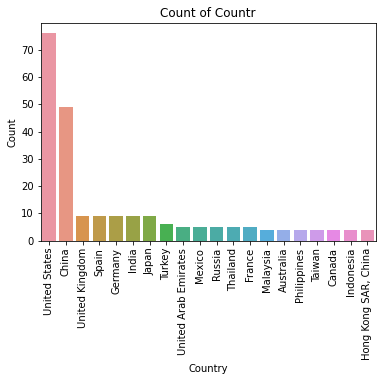

<Figure size 1440x1440 with 0 Axes>

In [69]:
sb.barplot( x = "Country", y = "Count", data = country_count)
plt.xticks(rotation = 90)
plt.title(label = "Count of Countr")
plt.figure(figsize = (20,20))
plt.show()

### 2. How many Years are mentioned ? 

In [64]:
year_count = airport["Year"].value_counts()
year_count = pd.DataFrame(data = year_count).reset_index()
year_count = year_count.rename(columns= {"index":"Year","Year": "Count"})
year_count = year_count.sort_values(by = "Year",ascending= True)
year_count

,Year,Count
4,2016,50
3,2017,50
2,2018,50
1,2019,50
0,2020,50


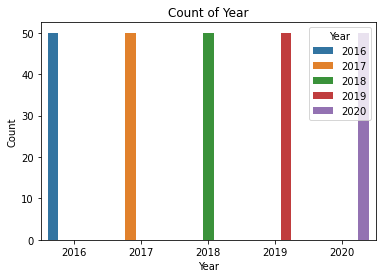

In [72]:
sb.barplot(x = "Year", y = "Count", hue = "Year", data = year_count)
plt.title(label= "Count of Year")
plt.xticks(rotation = 0)
plt.show()

### 3. Mean Passengers By Year

In [77]:
mean_passenger = pd.pivot_table(data = airport, values= "Passengers", index= "Year", aggfunc= "mean")
mean_passenger = mean_passenger.sort_values(by = "Year", ascending= True)
mean_passenger = pd.DataFrame(data = mean_passenger).reset_index()
mean_passenger

,Year,Passengers
0,2016,54489967.12
1,2017,57185583.46
2,2018,60171156.92
3,2019,61116771.62
4,2020,24467386.44


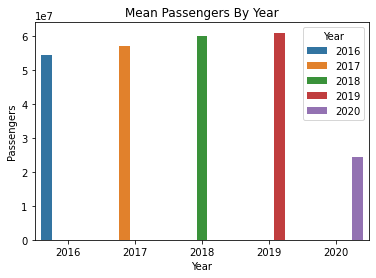

In [78]:
sb.barplot(x = "Year", y = "Passengers", hue = "Year", data = mean_passenger)
plt.title(label = "Mean Passengers By Year")
plt.xticks(rotation = 0)
plt.show()

### 4. Mean Passengers By Country

In [83]:
passenger_country = pd.pivot_table(data = airport, values= "Passengers", index= "Country", aggfunc= "mean")
passenger_country = pd.DataFrame(data = passenger_country).reset_index()
passenger_country = passenger_country.sort_values(by = "Country", ascending= True)
passenger_country

,Country,Passengers
0,Australia,4.357974e+07
1,Brazil,2.032252e+07
2,Canada,4.783845e+07
3,China,4.785537e+07
4,France,6.120836e+07
5,Germany,5.168424e+07
6,"Hong Kong SAR, China",7.222805e+07
7,India,5.275476e+07
8,Indonesia,5.984748e+07
9,Italy,4.189949e+07


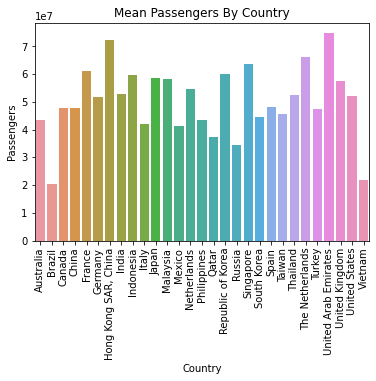

In [85]:
sb.barplot( x = "Country", y = "Passengers", data = passenger_country)
plt.xticks(rotation = 90)
plt.title(label = "Mean Passengers By Country")
plt.show()